In [98]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

# Часть 1

In [99]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

**№1.1**

In [100]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        l = len(y)
       # print(type(X))
       # print(type(w))
        
        scal = np.dot(X,w)
        diff1 = (scal - y)**2
        Q = sum(diff1)/l
        return Q
        # -- YOUR CODE HERE --
        # Вычислите значение функции потерь при помощи X, y и w и верните его

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        l1 = len(y)
        #gradQ = (2/l1)*X.T@(X@w - y)
        scal1 = np.dot(X,w)
        #print(scal1)
        trX = np.transpose(X)
        dpi = scal1 - y
        diff2 = np.dot(trX, dpi)
        
        gradQ =  (2*(diff2))/l1
        return gradQ
        # -- YOUR CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

In [101]:
# Создадим объект лосса
loss = MSELoss()
# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


**№ 1.2**

In [102]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE --
    L1 = []
    for j in range(n_iterations):
        #vect = []
        #for k in range(len(w_init)):
        wt = w_init - (lr * loss.calc_grad(X, y, w_init))
            #vect.append(wt)
        L1.append(wt)
        w_init = wt
    return L1    

In [103]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [104]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

155.26258214351947
0.8670644395649499


In [105]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # visualize the level set
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])
    
    plt.show()


**№1.3**

In [106]:
w_init

array([0.62074297, 1.79288146])

Посмотрим на траекторию при длине шага = 0.01

In [107]:
test_001 = gradient_descent(w_init, X, y, loss, 0.01, 100000)

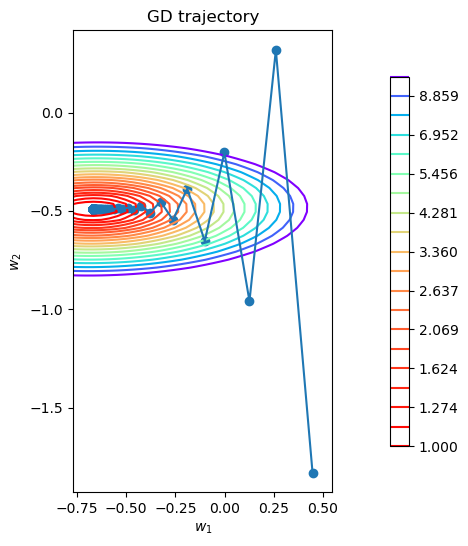

In [108]:
plot_gd(test_001, X, y, loss)

Сначала спуск сильно штормит, но при этом в итоге он приходит в нужную окрестность

Попробуем меньшие веса:

In [109]:
test_0001 = gradient_descent(w_init, X, y, loss, 0.001, 100000)

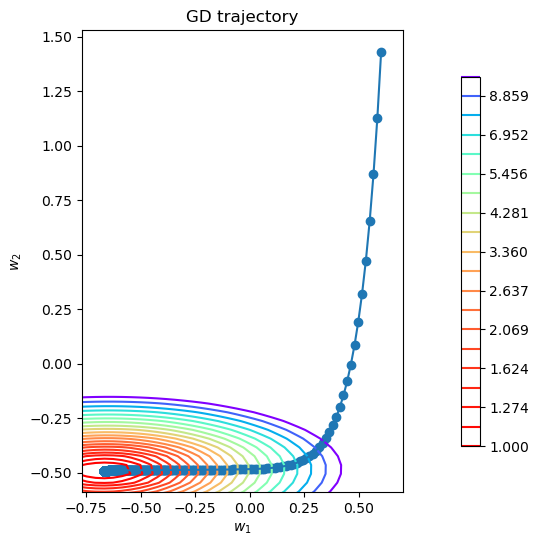

In [110]:
plot_gd(test_0001, X, y, loss)

здесь траектория более плавная, дает хороший результат

In [111]:
test_00005 = gradient_descent(w_init, X, y, loss, 0.0005, 100000)

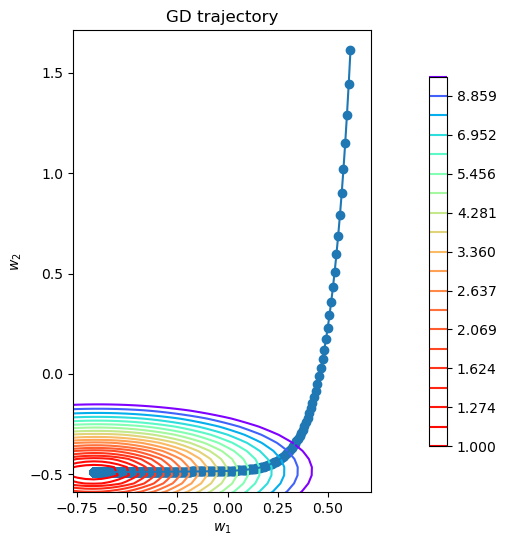

In [112]:
plot_gd(test_00005, X, y, loss)

похожий результат, но меньший шаг, возможно, даёт более точный результат

In [113]:
test_0005 = gradient_descent(w_init, X, y, loss, 0.005, 100000)

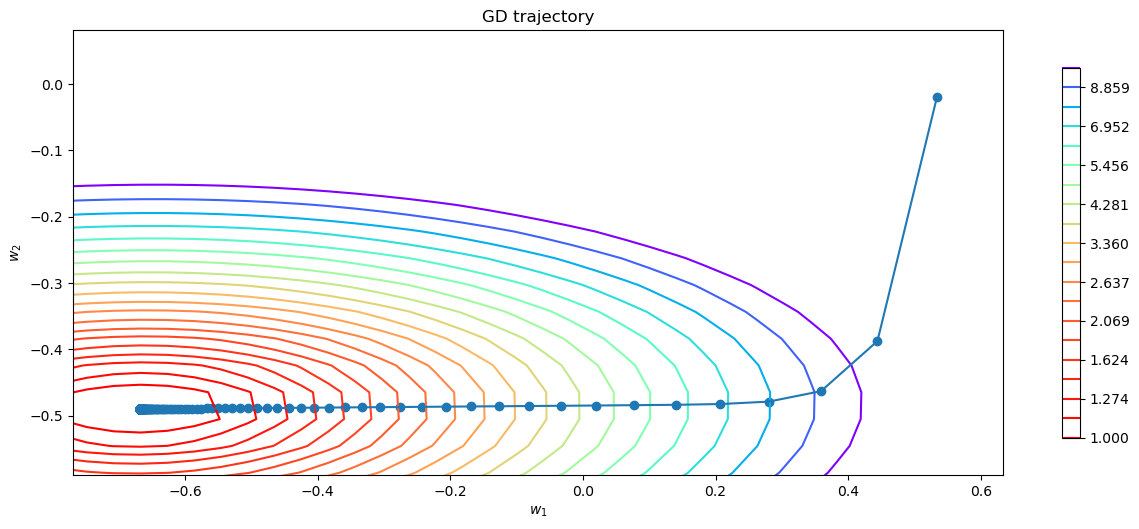

In [114]:
plot_gd(test_0005, X, y, loss)

увеличил шаг до 0.005, получилась более резкая траектория, но, судя по графику, результат даёт хороший

**№1.4**

In [115]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    L_stoch = []
    for u in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch = X[batch_indices]
        batch_y = y[batch_indices]
        wt_s = w_init - (lr * loss.calc_grad(batch, batch_y, w_init))
            
        L_stoch.append(wt_s)
        w_init = wt_s
    return L_stoch    

**1.5**

Посмотрим на траекторию для шага 0.001 и 150 элементов:

In [116]:
test_stoch_0001_150 = stochastic_gradient_descent(w_init, X, y, loss, 0.001, 150, 1000)

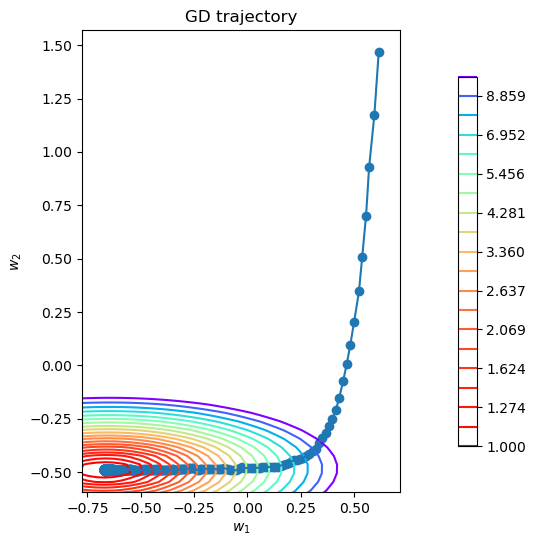

In [117]:
plot_gd(test_stoch_0001_150, X, y, loss)

Траектория довольно плавная 

Теперь попробуем снизить размер выборки, но оставить шаг

In [118]:
test_stoch_0001_50 = stochastic_gradient_descent(w_init, X, y, loss, 0.001, 50, 1000)

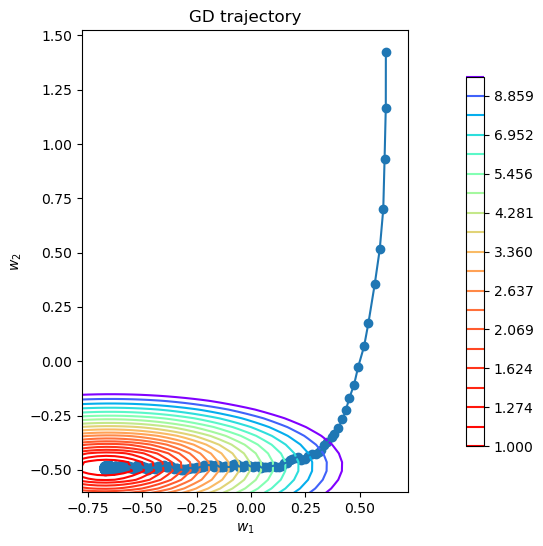

In [119]:
plot_gd(test_stoch_0001_50, X, y, loss)

траектория менее плавная; скорее всего, из-за сильного уменьшения числа объектов пострадает точность

Теперь попробуем увеличить шаг:

In [120]:
test_stoch_001_150 = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 150, 1000)

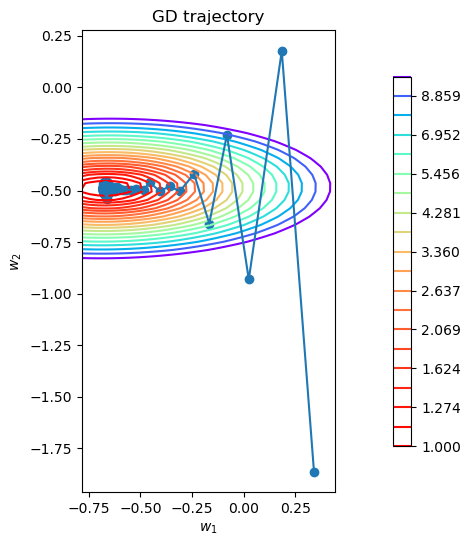

In [121]:
plot_gd(test_stoch_001_150, X, y, loss)

траектория сильно изменилась и пострадала точность

попробуем еще и уменьшить выборку:

In [122]:
test_stoch_001_50 = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 50, 1000)

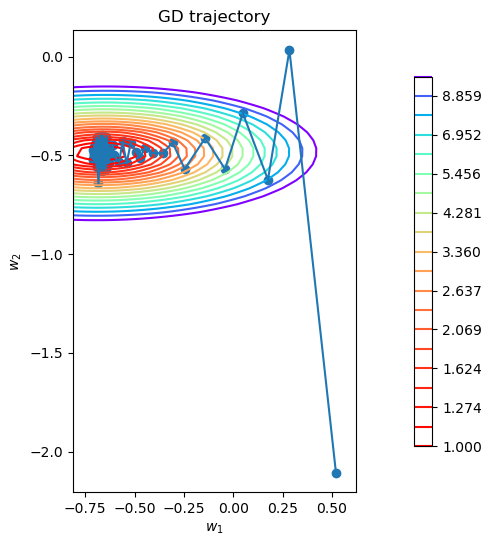

In [123]:
plot_gd(test_stoch_001_50, X, y, loss)

кажется, стало ещё хуже

Таким образом, можно сделать вывод что в стохастическом градиентном спуске не стоит сильно уменьшать выборку, а также лучше делать среднего размера либо маленький шаг(~0.001)

**№1.6**

чтобы не путать функции, назову эту функцию stochastic_gradient_descent_2

In [124]:
def stochastic_gradient_descent_2(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    L_stoch_2 = []
    for a in range(n_iterations):
        batch_indices_2 = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch_2 = X[batch_indices_2]
        batch_y_2 = y[batch_indices_2]
        wt_s2 = w_init - (lr * loss.calc_grad(batch_2, batch_y_2, w_init))
            
        L_stoch_2.append(wt_s2)
        w_init = wt_s2
        t = 1
        lr = lr * ((1/(1+t))**p)
        t += 1
    return L_stoch_2  
    

**№1.7**

возьмем p = 0.1

In [125]:
test_stoch2_01 = stochastic_gradient_descent_2(w_init, X, y, loss, 0.01, 10, 0.1, 1000)

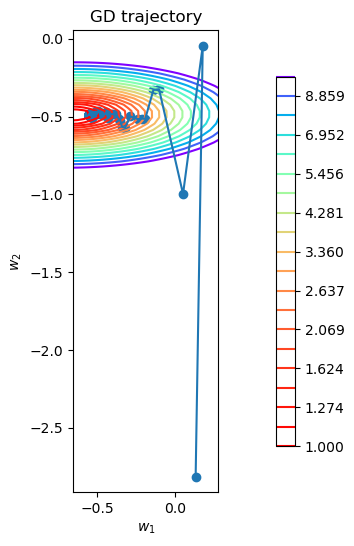

In [126]:
plot_gd(test_stoch2_01, X, y, loss)

качество не очень хорошее, увеличим p:

In [127]:
test_stoch2_025 = stochastic_gradient_descent_2(w_init, X, y, loss, 0.01, 10, 0.25, 1000)

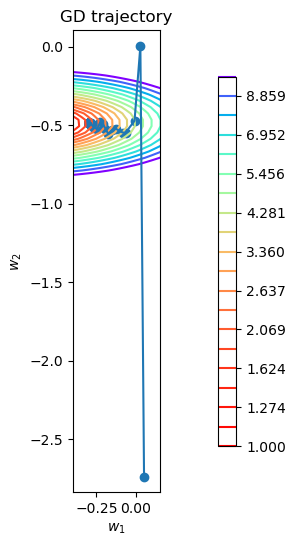

In [128]:
plot_gd(test_stoch2_025, X, y, loss)

теперь спуск вообще не доходит до минимума, это еще хуже чем при p=0.1

In [129]:
test_stoch2_05 = stochastic_gradient_descent_2(w_init, X, y, loss, 0.01, 10, 0.5, 1000)

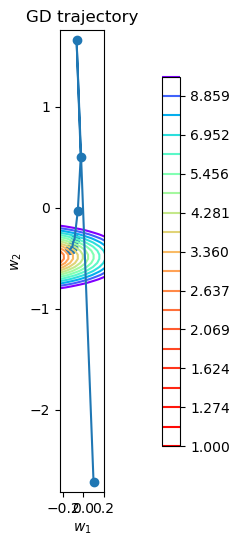

In [130]:
plot_gd(test_stoch2_05, X, y, loss)

пока с увеличением p становится хуже

In [131]:
test_stoch2_1 = stochastic_gradient_descent_2(w_init, X, y, loss, 0.01, 10, 1, 1000)

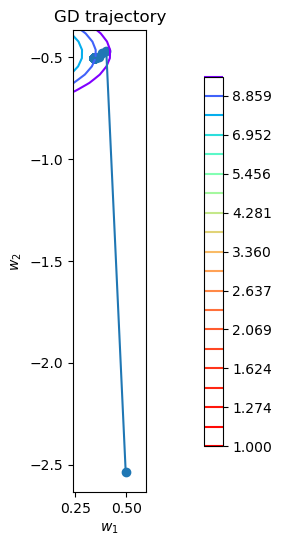

In [132]:
plot_gd(test_stoch2_1, X, y, loss)

при увеличении p стохастический градиентный спуск теряет точность

**№1.8**

сравним значения лосса у стохастического и обычного град спуска для lr = 0.001 и batch_size = 10

сначала изобразим график стох спуска с такими параметрами:

In [133]:
test_stoch2_0001_10 = stochastic_gradient_descent(w_init, X, y, loss, 0.001, 10, 1000)

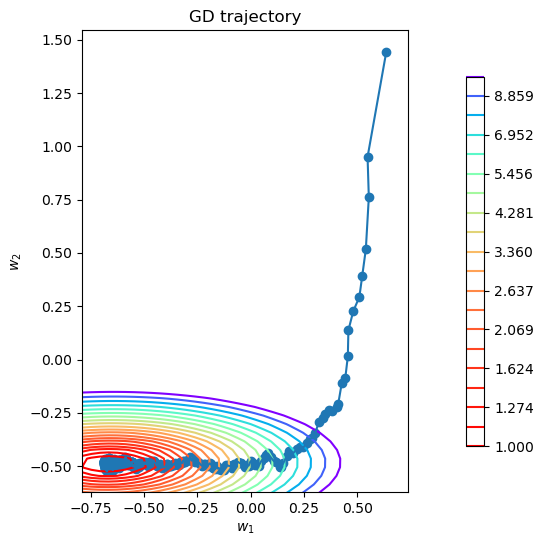

In [134]:
plot_gd(test_stoch2_0001_10, X, y, loss)

In [135]:
w_stoch_8 = stochastic_gradient_descent(w_init, X, y, loss, 0.001, 10, 50)

In [136]:
w_stoch_8

[array([0.5839745 , 1.53316652]),
 array([0.52576135, 1.10235148]),
 array([0.46826267, 0.79214399]),
 array([0.41471464, 0.57705422]),
 array([0.38199076, 0.50678103]),
 array([0.38299994, 0.37249533]),
 array([0.35320193, 0.27411145]),
 array([0.33150669, 0.16603658]),
 array([0.32267203, 0.07285453]),
 array([ 0.29949809, -0.03368456]),
 array([ 0.2882105, -0.1026032]),
 array([ 0.26749794, -0.18903554]),
 array([ 0.24036748, -0.26853754]),
 array([ 0.23728102, -0.28499485]),
 array([ 0.21749632, -0.31471817]),
 array([ 0.20094657, -0.34512639]),
 array([ 0.18852819, -0.33684575]),
 array([ 0.17603391, -0.3625697 ]),
 array([ 0.16015808, -0.34892972]),
 array([ 0.14510415, -0.35725145]),
 array([ 0.12967906, -0.38356596]),
 array([ 0.11421928, -0.41839923]),
 array([ 0.10545562, -0.45509944]),
 array([ 0.08196614, -0.44228666]),
 array([ 0.06754132, -0.46674064]),
 array([ 0.05699713, -0.47299943]),
 array([ 0.04517862, -0.47539531]),
 array([ 0.03681885, -0.50207704]),
 array([ 0.0

In [137]:
loss_sgd_list = []
for w_i in w_stoch_8:
    sgdl = loss.calc_loss(X, y, w_i)
    loss_sgd_list.append(sgdl)

чтобы построить график найдем значения ошибок на каждой итерации

In [138]:
loss_sgd_list

[336.22361396044187,
 211.73173966196683,
 140.15166291295395,
 99.31521651564982,
 87.3437636497717,
 67.62484254679929,
 54.540084228733576,
 42.1135206215216,
 33.03890233032633,
 24.168517680882374,
 19.448179775984716,
 14.505843838547216,
 10.901674703362897,
 10.316883039767655,
 9.177577443175778,
 8.21129210754055,
 8.236940730045673,
 7.524837066340494,
 7.6017421921635435,
 7.23992865206873,
 6.573083494283293,
 5.923474433063681,
 5.539806739575079,
 5.338692471340207,
 5.056512067960903,
 4.9232673725156655,
 4.788526532761378,
 4.713289561881491,
 4.629891732284128,
 4.511719258726683,
 4.34271792237956,
 4.246503476207008,
 4.131097032600786,
 4.047477292269889,
 3.9539600431577933,
 3.8690865015876694,
 3.8384207104465697,
 3.744425182364051,
 3.623822815491175,
 3.5324937311640503,
 3.4641215803475855,
 3.382018506797346,
 3.3126417863808864,
 3.2577257952222203,
 3.219056370096071,
 3.1190699342883783,
 3.064823969676008,
 3.023789163617104,
 3.0849777330941954,
 2.99

In [139]:
w_8 = gradient_descent(w_init, X, y, loss, 0.001, 50)

In [140]:
w_8

[array([0.60340442, 1.43055328]),
 array([0.58593531, 1.12594129]),
 array([0.56840096, 0.86984854]),
 array([0.55085562, 0.65454367]),
 array([0.5333442 , 0.47352732]),
 array([0.5159038 , 0.32133581]),
 array([0.49856494, 0.19337614]),
 array([0.48135266, 0.08578718]),
 array([ 0.46428735, -0.00467689]),
 array([ 0.44738553, -0.08074469]),
 array([ 0.43066048, -0.14471   ]),
 array([ 0.41412277, -0.1985011 ]),
 array([ 0.39778066, -0.243739  ]),
 array([ 0.38164054, -0.2817864 ]),
 array([ 0.36570717, -0.31378883]),
 array([ 0.34998401, -0.34070932]),
 array([ 0.33447339, -0.36335741]),
 array([ 0.31917674, -0.38241366]),
 array([ 0.30409469, -0.39845017]),
 array([ 0.28922726, -0.41194789]),
 array([ 0.27457393, -0.42331113]),
 array([ 0.26013374, -0.43287976]),
 array([ 0.24590539, -0.44093953]),
 array([ 0.23188725, -0.44773062]),
 array([ 0.2180775 , -0.45345496]),
 array([ 0.20447408, -0.45828231]),
 array([ 0.19107482, -0.46235537]),
 array([ 0.17787739, -0.46579411]),
 array([

In [141]:
loss_list = []
for w_j in w_8:
    gdl = loss.calc_loss(X, y, w_j)
    loss_list.append(gdl)

In [142]:
loss_list

[304.4618116242329,
 218.75737671539716,
 158.08907179429468,
 115.11658520973268,
 84.65252124743166,
 63.03092411704824,
 47.66102217640338,
 36.711864832873566,
 28.8894595588368,
 23.27927750814468,
 19.234954254683885,
 16.29963601078307,
 14.150395973703244,
 12.558954026596496,
 11.363917805085764,
 10.45116576157829,
 9.739984072975735,
 9.173269714859495,
 8.710607043290311,
 8.323375048032782,
 7.991289656039243,
 7.69996016759435,
 7.439162368205802,
 7.201618107350278,
 6.982132792200898,
 6.776985816656855,
 6.583499737886709,
 6.399735772817715,
 6.224278564662575,
 6.056084036763844,
 5.894371830734602,
 5.738549253016133,
 5.588157489263543,
 5.442833556320024,
 5.3022833769094015,
 5.16626271574411,
 5.03456367229414,
 4.907005101444183,
 4.783425810974313,
 4.663679722390341,
 4.547632420201976,
 4.435158683343804,
 4.326140711579449,
 4.220466843929489,
 4.118030625667002,
 4.018730122475966,
 3.922467410085738,
 3.829148188696612,
 3.7386814863542366,
 3.65097942592

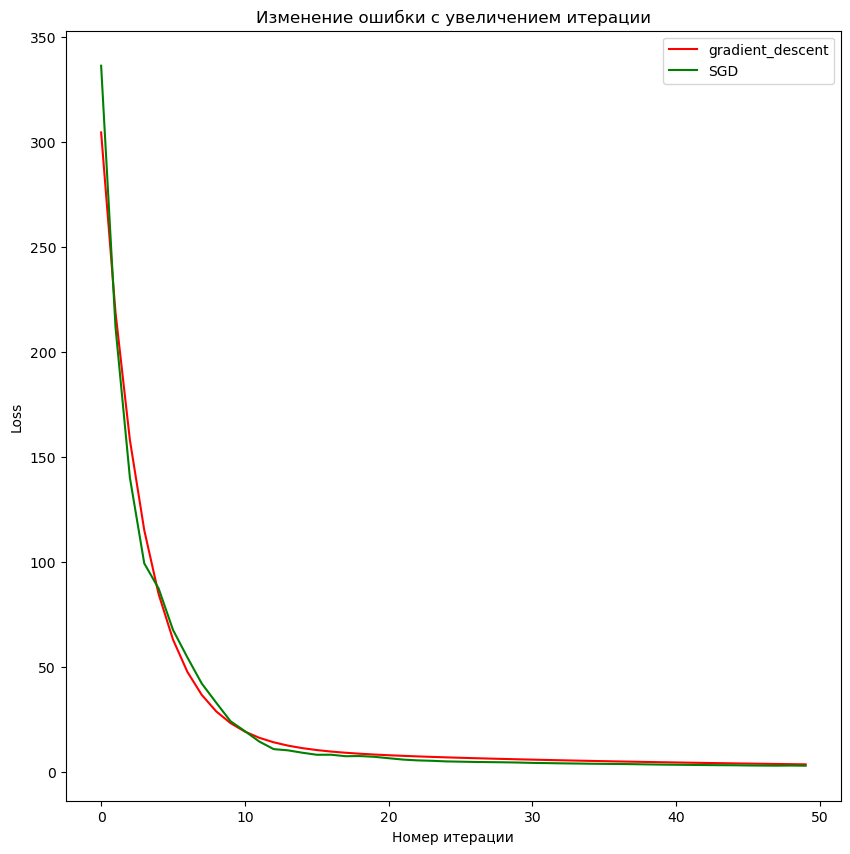

In [143]:
plt.figure(figsize=(10,10))
plt.plot(loss_list, color='r', label='gradient_descent') 
plt.plot(loss_sgd_list, color='g', label='SGD')

plt.xlabel("Номер итерации") 
plt.ylabel("Loss") 
plt.title("Изменение ошибки с увеличением итерации") 
  

plt.legend() 
  

plt.show() 

Для наглядности я уменьшил кол-во итераций до 50, так как если их ~1000, то разница очень плохо видна

Заметим, что обычный градиентный спуск быстрее уменьшает ошибку

Это может быть связано с небольшим batch_size (предположение)

Соответственно, в данной модели лучше использовать обычный градиентный спуск

# Часть 2

**№2.1**

In [144]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        w_init = np.random.randn(X.shape[1])
        way_fit = gradient_descent(w_init, X, y, self.loss, self.lr)
        self.w = way_fit[-1]
        

        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        answers = np.dot(X, self.w)
        
        return answers, self.w

In [145]:
linear_regression = LinearRegression(MSELoss())

In [146]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,
    na_values=["?"],
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [147]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

**№2.2**

In [148]:
X_raw.head()

,index,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,24
0,0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
2,2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,...,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26
3,3,2,164.0,audi,gas,std,four,sedan,fwd,front,...,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30
4,4,2,164.0,audi,gas,std,four,sedan,4wd,front,...,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22


In [149]:
X_raw.isnull().mean()

index    0.00000
0        0.00000
1        0.18408
2        0.00000
3        0.00000
4        0.00000
5        0.00995
6        0.00000
7        0.00000
8        0.00000
9        0.00000
10       0.00000
11       0.00000
12       0.00000
13       0.00000
14       0.00000
15       0.00000
16       0.00000
17       0.00000
18       0.01990
19       0.01990
20       0.00000
21       0.00995
22       0.00995
23       0.00000
24       0.00000
dtype: float64

In [150]:
#pd.isnull(X_raw)

In [151]:
X_raw.isnull().sum()

index     0
0         0
1        37
2         0
3         0
4         0
5         2
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        4
19        4
20        0
21        2
22        2
23        0
24        0
dtype: int64

заметим, что все пропуски в числовых столбцах

In [152]:
o1 = X_raw[1].fillna(X_raw[1].mean())
X_raw[1] = o1

In [153]:
#X_raw.isnull().sum()

In [154]:
X_raw.head()

,index,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,24
0,0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
2,2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,...,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26
3,3,2,164.0,audi,gas,std,four,sedan,fwd,front,...,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30
4,4,2,164.0,audi,gas,std,four,sedan,4wd,front,...,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22


In [155]:
o18 = X_raw[18].fillna(X_raw[18].mean())
X_raw[18] = o18

In [156]:
o19 = X_raw[19].fillna(X_raw[19].mean())
X_raw[19] = o19

In [157]:
o21 = X_raw[21].fillna(X_raw[21].mean())
X_raw[21] = o21

In [158]:
o22 = X_raw[22].fillna(X_raw[22].mean())
X_raw[22] = o22

In [159]:
X_raw.isnull().sum()

index    0
0        0
1        0
2        0
3        0
4        0
5        2
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
dtype: int64

заменил все пропуски кроме двух в категориальном столбцке 5. Эти строки удалю

In [160]:
X_raw[5].isnull == 'True'

False

In [161]:
null_data = X_raw[X_raw.isnull().any(axis=1)]

In [162]:
null_data

,index,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,24
26,27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,...,four,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30
60,63,0,122.0,mazda,diesel,std,NaN,sedan,fwd,front,...,four,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42


In [163]:
X_raw = X_raw.drop(index=[26, 60])

In [164]:
X_raw.isnull().sum()

index    0
0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
dtype: int64

обработали пропуски

In [165]:
X_raw.iloc[:, 9:17]

,8,9,10,11,12,13,14,15
0,front,88.6,168.8,64.1,48.8,2548,dohc,four
1,front,88.6,168.8,64.1,48.8,2548,dohc,four
2,front,94.5,171.2,65.5,52.4,2823,ohcv,six
3,front,99.8,176.6,66.2,54.3,2337,ohc,four
4,front,99.4,176.6,66.4,54.3,2824,ohc,five
...,...,...,...,...,...,...,...,...
196,front,109.1,188.8,68.9,55.5,2952,ohc,four
197,front,109.1,188.8,68.8,55.5,3049,ohc,four
198,front,109.1,188.8,68.9,55.5,3012,ohcv,six
199,front,109.1,188.8,68.9,55.5,3217,ohc,six


In [166]:
from sklearn. preprocessing import OneHotEncoder

In [167]:
encoder = OneHotEncoder(handle_unknown='ignore')

In [168]:
#применяем one-hot encoding к 'target' 
#ncoder_data = pd.DataFrame(encoder. fit_transform(X_raw[[2]]).toarray())

#merge one-hot encoded columns back with original DataFrame
#inal_data = X_raw.join (encoder_data)

#view final df
#inal_data

In [169]:
X_raw = pd.get_dummies(X_raw, columns=[2,3,4,5,6,7,8,14,15,17])

In [170]:
X_raw.head()

,index,0,1,9,10,11,12,13,16,18,...,15_twelve,15_two,17_1bbl,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
0,0,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,...,False,False,False,False,False,False,False,True,False,False
1,1,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,...,False,False,False,False,False,False,False,True,False,False
2,2,1,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,...,False,False,False,False,False,False,False,True,False,False
3,3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,...,False,False,False,False,False,False,False,True,False,False
4,4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,...,False,False,False,False,False,False,False,True,False,False


закодировали категориальные признаки

In [171]:
from sklearn.preprocessing import MinMaxScaler

In [172]:
#normalizer = MinMaxScaler()

#X_raw.columns = X_raw.columns.astype(str)

#X_real_norm_np = normalizer.fit_transform(X_raw)

#X_raw = pd.DataFrame(data=X_real_norm_np)

In [173]:
#from sklearn. preprocessing import MinMaxScaler

In [174]:
#mms = MinMaxScaler()

In [175]:
#mms.fit(X_raw[[0,1,9,10,11,12,13,16]])

In [176]:
#X_raw = pd.DataFrame(mms.transform(X_raw[[0,1,9,10,11,12,13,16]]), columns=X_raw[[0,1,9,10,11,12,13,16]])

разделим выборку на обуч и тестовую:

In [177]:
from sklearn.model_selection import train_test_split 

In [178]:
y = y.drop(index=[26, 60])

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X_raw, y , random_state=104,  test_size=0.3)

**№2.3**

In [180]:
print(type(X_train[0][0]))
print(type(y_train[0]))

<class 'numpy.int64'>
<class 'numpy.float64'>


In [181]:
#X_train = X_train.drop(17, axis=1, inplace=False)
display(X_train)

,index,0,1,9,10,11,12,13,16,18,...,15_twelve,15_two,17_1bbl,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
52,55,3,150.0,95.3,169.0,65.7,49.6,2380,70,3.330711,...,False,True,False,False,True,False,False,False,False,False
167,171,2,134.0,98.4,176.2,65.6,52.0,2714,146,3.620000,...,False,False,False,False,False,False,False,True,False,False
99,102,0,108.0,100.4,184.6,66.5,56.1,3296,181,3.430000,...,False,False,False,False,False,False,False,True,False,False
42,43,0,122.0,94.3,170.7,61.8,53.5,2337,111,3.310000,...,False,False,False,True,False,False,False,False,False,False
124,127,3,122.0,89.5,168.9,65.0,51.6,2756,194,3.740000,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,133,2,104.0,99.1,186.6,66.5,56.1,2695,121,3.540000,...,False,False,False,False,False,False,False,True,False,False
168,172,2,134.0,98.4,176.2,65.6,53.0,2975,146,3.620000,...,False,False,False,False,False,False,False,True,False,False
144,148,0,85.0,96.9,173.6,65.4,54.9,2420,108,3.620000,...,False,False,False,True,False,False,False,False,False,False
195,199,-1,74.0,104.3,188.8,67.2,57.5,3157,130,3.620000,...,False,False,False,False,False,False,False,True,False,False


In [182]:
linear_regression.fit(np.asarray(X_train).astype(np.float32), np.asarray(y_train).astype(np.float32))

C:\Users\Gavrin Gleb\AppData\Local\Temp\ipykernel_19812\559483404.py:37: RuntimeWarning: overflow encountered in multiply
  gradQ =  (2*(diff2))/l1


In [183]:
y_pred, _ = linear_regression.predict(X_train)
print(y_pred)

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan]


In [184]:
y_train.shape

(139,)

In [185]:
x = np.arange(1, 10).reshape(3, 3)
print(x)

y = np.arange(1, 4)#.reshape(3, 3)
print(y)

w = np.arange(1, 4)#.reshape(3, 3)
print(w)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[1 2 3]
[1 2 3]


In [186]:
np.dot(x, w)#- y

array([14, 32, 50])

# Задание 3

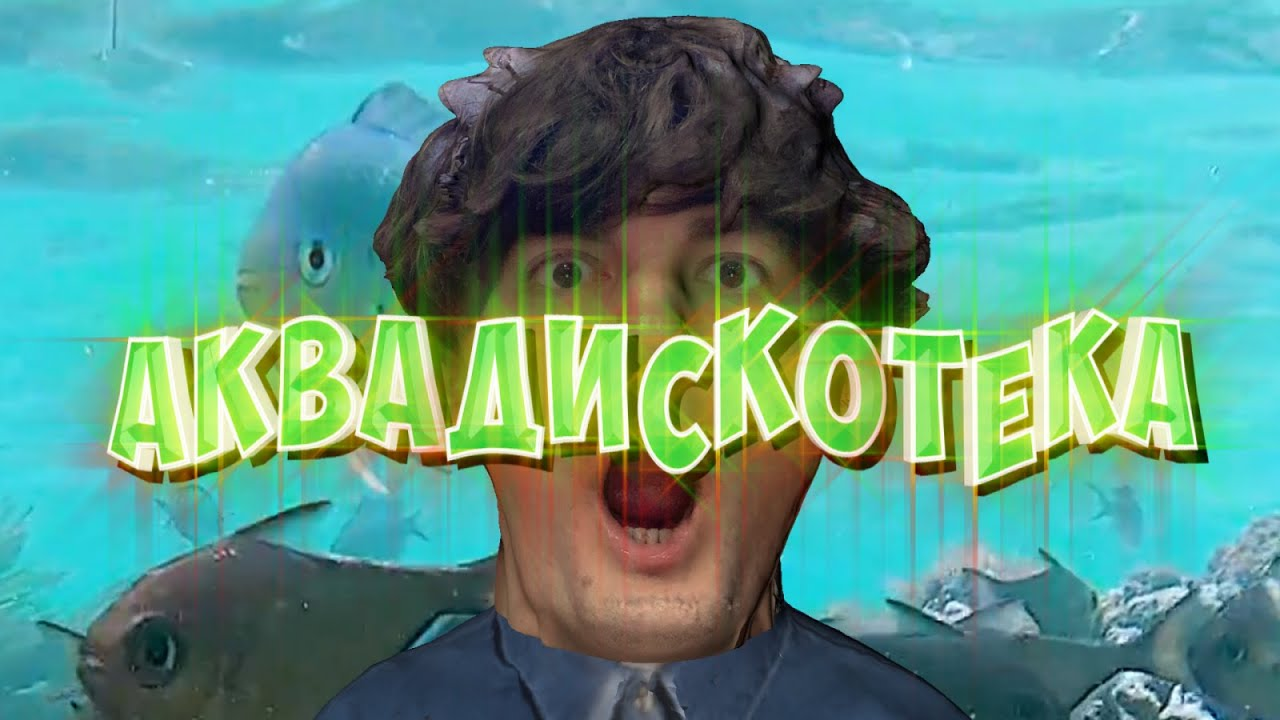